In [1]:
import pandas as  pd
import matplotlib.pyplot as plt 
import tensorflow as tf
import quandl
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error ,  r2_score
import datetime

In [2]:
Data = quandl.get("BCHARTS/BITSTAMPUSD", authtoken="4QxSz6Qa948RE7_PqsXw", collapse="daily")

In [3]:
Data

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-13,5.80,6.00,5.65,5.97,58.371382,3.460974e+02,5.929231
2011-09-14,5.58,5.72,5.52,5.53,61.145984,3.418548e+02,5.590798
2011-09-15,5.12,5.24,5.00,5.13,80.140795,4.082590e+02,5.094272
2011-09-16,4.82,4.87,4.80,4.85,39.914007,1.937631e+02,4.854515
2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000e+00,4.870000
...,...,...,...,...,...,...,...
2021-06-03,37585.12,39490.00,37176.06,39219.88,4058.942932,1.567207e+08,38611.208700
2021-06-04,39242.94,39277.36,35576.67,36887.32,5786.186087,2.137323e+08,36938.368803
2021-06-05,36851.58,37927.93,34849.65,35532.14,4106.348807,1.492555e+08,36347.504632


In [4]:
Data.reset_index(level=0,inplace=True )

In [5]:
Data.head(5)

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2011-09-13,5.80,6.00,5.65,5.97,58.371382,346.097389,5.929231
1,2011-09-14,5.58,5.72,5.52,5.53,61.145984,341.854813,5.590798
2,2011-09-15,5.12,5.24,5.00,5.13,80.140795,408.259002,5.094272
3,2011-09-16,4.82,4.87,4.80,4.85,39.914007,193.763147,4.854515
4,2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000


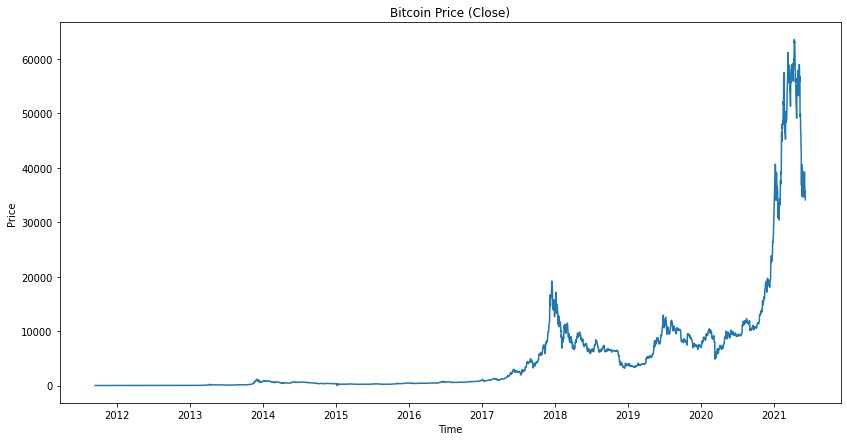

In [6]:
plt.figure(figsize=(14,7))
plt.plot(Data['Date'], Data['Close'])
plt.title('Bitcoin Price (Close)')
plt.ylabel('Price');
plt.xlabel('Time');
plt.show()

In [7]:

# mask = (Data['Date'] >= '2014-12-01') 
# data = Data.loc[mask]
data = Data.iloc[:,1:]
data = data.astype('float32')

In [8]:
data

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,5.800000,6.000000,5.650000,5.970000,58.371384,3.460974e+02,5.929231
1,5.580000,5.720000,5.520000,5.530000,61.145985,3.418548e+02,5.590797
2,5.120000,5.240000,5.000000,5.130000,80.140793,4.082590e+02,5.094272
3,4.820000,4.870000,4.800000,4.850000,39.914005,1.937632e+02,4.854515
4,4.870000,4.870000,4.870000,4.870000,0.300000,1.461000e+00,4.870000
...,...,...,...,...,...,...,...
3542,37585.121094,39490.000000,37176.058594,39219.878906,4058.942871,1.567207e+08,38611.207031
3543,39242.941406,39277.359375,35576.671875,36887.320312,5786.186035,2.137323e+08,36938.367188
3544,36851.578125,37927.929688,34849.648438,35532.140625,4106.348633,1.492555e+08,36347.503906
3545,35532.589844,36510.578125,35250.000000,35808.851562,2526.733643,9.074430e+07,35913.679688


In [9]:
n_samples = data.shape[0]

In [10]:
data.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,3547.000000,3547.000000,3547.000000,3547.000000,3547.000000,3.547000e+03,3547.000000
mean,5268.873047,5433.980469,5076.021484,5274.899414,9566.478516,4.637365e+07,5262.157227
std,10212.577148,10548.255859,9800.079102,10213.927734,9993.763672,9.338514e+07,10197.396484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,235.250000,238.709999,230.900002,235.595001,3633.540039,1.557794e+06,235.198631
50%,669.000000,683.880005,650.010010,669.989990,6934.135254,7.433824e+06,665.012878
75%,7331.514893,7503.419922,7135.354980,7337.450195,12233.363281,5.183641e+07,7313.222412
max,63605.691406,64895.218750,61998.898438,63564.480469,137070.171875,1.369434e+09,63314.687500


<AxesSubplot:title={'center':'Correlation entre les variables'}>

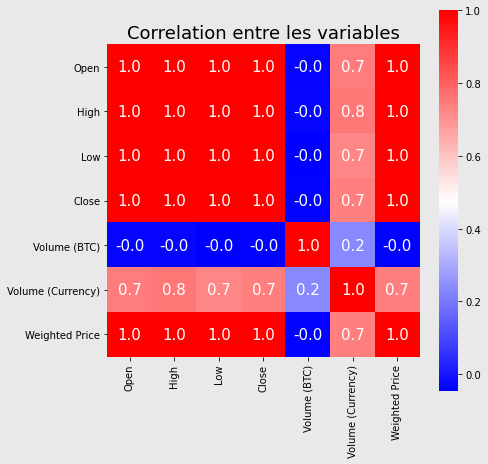

In [11]:
fig=plt.figure(figsize=(7,7))
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Correlation entre les variables",size=18)
sns.heatmap(data.corr(),square= True, fmt='.1f',annot=True, annot_kws={'size':15},cmap="bwr")

## Trading indicatiors

#### MACD INDICATOR

In [12]:
def MACD(df):
    EMA12 = pd.DataFrame.ewm(df,span=12).mean()
    EMA26 = pd.DataFrame.ewm(df,span=26).mean()
    MACD  = EMA12 - EMA26
    
    Signal = pd.DataFrame.ewm(MACD,span=9).mean()
    
    Macd_Hist = MACD-Signal
    
    return Macd_Hist , MACD , Signal
    

In [13]:
MACD_hist , MACD , Signal =MACD(data["Close"])

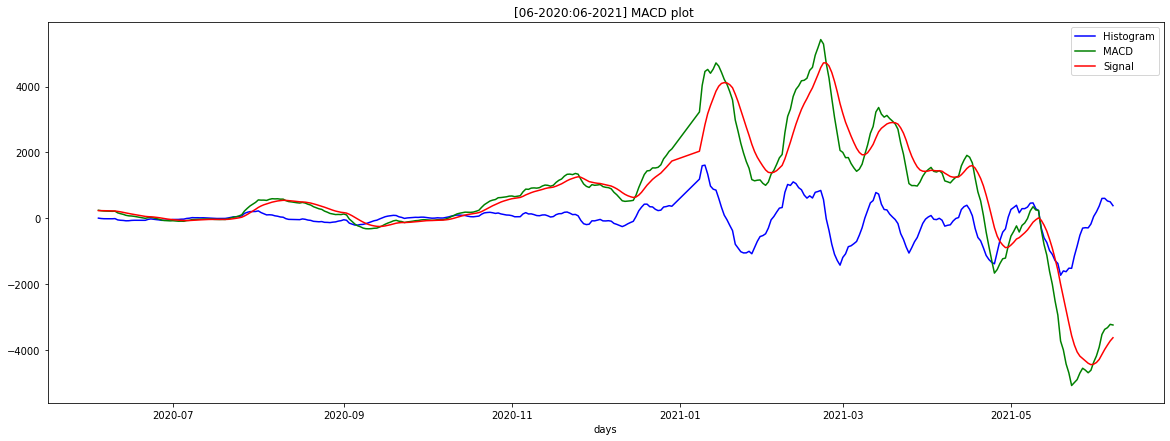

In [14]:
plt.figure(figsize=(20,7))
plt.plot(Data['Date'].iloc[len(MACD_hist)-360 : len(MACD_hist)], MACD_hist[len(MACD_hist)-360 : len(MACD_hist)],color='b', label='Histogram')
plt.plot(Data['Date'].iloc[len(MACD_hist)-360 : len(MACD_hist)], MACD[len(MACD_hist)-360 : len(MACD_hist)],color='g', label='MACD')
plt.plot(Data['Date'].iloc[len(MACD_hist)-360 : len(MACD_hist)], Signal[len(MACD_hist)-360 : len(MACD_hist)],color='r', label='Signal')
plt.xlabel('days')
plt.legend()
plt.title("[06-2020:06-2021] MACD plot ")
plt.show()

####  Stochastics Oscillator

In [15]:
def Stoch_Oscillator(df):
    L14 = df['Low'].rolling(14).min()
    H14 = df['High'].rolling(14).max()
    K   =  (df['Close']- L14)*100/(H14 - L14)
    return K
    

In [16]:
K=Stoch_Oscillator(data)

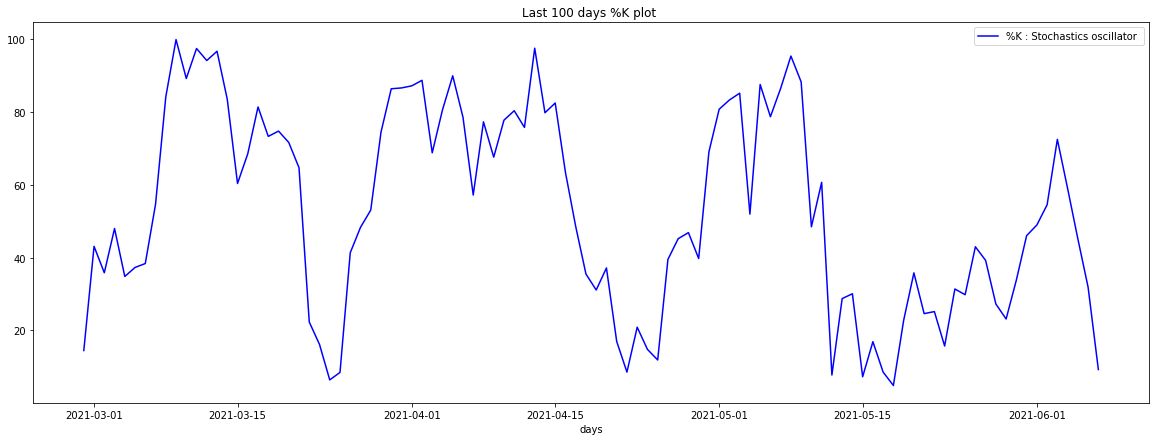

In [17]:
plt.figure(figsize=(20,7))
plt.plot(Data['Date'].iloc[len(MACD_hist)-100 : len(MACD_hist)], K[len(MACD_hist)-100 : len(MACD_hist)],color='b', label='%K : Stochastics oscillator ')
plt.xlabel('days')
plt.legend()
plt.title("Last 100 days %K plot ")
plt.show()

#### Average true range

In [18]:
def Average_T_range(df):
    HL = df['High']-df['Low']
    HC = np.abs(df['High']-df['Close'].shift())
    LC =  np.abs(df['Low']-df['Close'].shift())
    ct = pd.concat([HL,HC,LC],axis=1)
    Tr = np.max(ct,axis=1) 
    ATR = Tr.rolling(14).mean()
    return ATR

In [19]:
atr = Average_T_range(data)

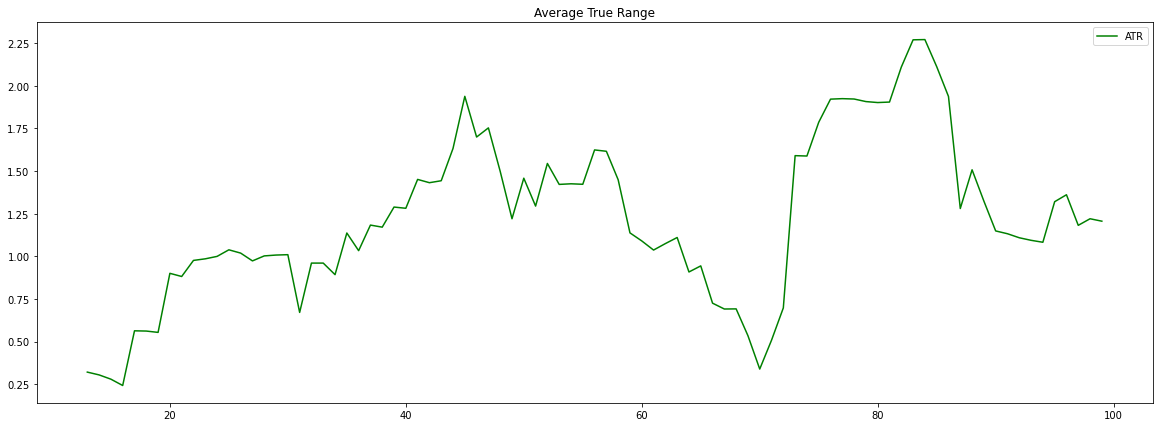

In [20]:
plt.figure(figsize=(20,7))
plt.plot(atr[0:100],label='ATR',color='green')
plt.title('Average True Range')
plt.legend()
plt.show()

### Getting final  data

In [21]:
data['MACD']= MACD_hist
data['%K']=K
data['ATR']=atr
data['Close Target'] = data['Close'].shift(-1)

In [22]:
df = data[['Open','High','Low','Close','Volume (BTC)','Volume (Currency)','Weighted Price','MACD','%K','ATR','Close Target']]

In [23]:
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,MACD,%K,ATR,Close Target
0,5.80,6.00,5.65,5.97,58.371384,346.097382,5.929231,0.000000,NaN,NaN,5.53
1,5.58,5.72,5.52,5.53,61.145985,341.854828,5.590797,-0.004387,NaN,NaN,5.13
2,5.12,5.24,5.00,5.13,80.140793,408.259003,5.094272,-0.011507,NaN,NaN,4.85
3,4.82,4.87,4.80,4.85,39.914005,193.763153,4.854515,-0.018434,NaN,NaN,4.87
4,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000,-0.018028,NaN,NaN,4.92


In [24]:
df=df.dropna()

In [25]:
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,MACD,%K,ATR,Close Target
13,6.06,6.06,4.80,4.80,39.578465,236.800858,5.983074,-0.000551,0.000000,0.320714,4.92
14,4.85,4.92,4.85,4.92,24.354500,119.225060,4.895401,-0.027334,9.523802,0.304286,4.82
15,4.90,4.91,4.82,4.82,83.053329,403.846619,4.862498,-0.046902,1.587300,0.279286,4.82
16,4.81,4.82,4.81,4.82,46.964500,226.197220,4.816345,-0.056163,1.587300,0.242143,0.00
17,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,-0.300575,0.000000,0.562857,0.00


## Normalize data

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))

df = df.drop(['Open','High','Low','Volume (BTC)','Volume (Currency)','Weighted Price'], axis=1)
df.head()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)


## Initialize Model

In [27]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:df.shape[1]-1]
y=df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers


In [29]:
# timesteps data
def create_dataset(X,y,time_steps=1):
    X_train=[]
    y_train=[]
    for i in range(time_steps,X.shape[0]):
        X_train.append(X[i-time_steps:i])
        y_train.append(y[i])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train , y_train

In [30]:
def test_set(X_train,X_test,y_train,y_test,time_steps=1):
    x=X_train.tail(time_steps)
    y= y_train.tail(time_steps)
    X_test=x.append(X_test,ignore_index=True)
    y_test=y.append(y_test,ignore_index=True)
    return create_dataset(X_test,y_test)

In [31]:
X_test , y_test = test_set(X_train,X_test,y_train,y_test)

In [32]:
X_train,y_train = create_dataset(X_train,y_train)


In [33]:
def model(hp):
    model = Sequential()
    model.add(layers.LSTM(units=hp.Int('units_input', 80, 120, step=10), return_sequences = True ,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.Dropout(hp.Float('dropout_input', 0, 0.5, step=0.1, default=0.2)))
    n=hp.Int('number of hidden layers',2,6)
    for i in range(n):
        if i < n-1 :
            model.add(layers.LSTM(units=hp.Int('units_{0}'.format(i), 50, 90, step=10), return_sequences = True ))
            model.add(layers.Dropout(hp.Float('dropout_{0}'.format(i), 0, 0.5, step=0.1, default=0.2)))
        else : 
            model.add(layers.LSTM(units=hp.Int('units_{0}'.format(n-1), 50, 90, step=10)))
            model.add(layers.Dropout(hp.Float('dropout_{0}'.format(n-1), 0, 0.5, step=0.1, default=0.2)))
    model.add(layers.Dense(1))
    model.add(layers.Activation('linear'))
    model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-6,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),metrics='mse')
    return model




#### Hyper-Parameters tuning

In [34]:
import kerastuner as kt

tuner = kt.Hyperband( model,
    objective='val_loss',
    max_epochs=30,
    hyperband_iterations=2,project_name='LSTM hyper-parameters2')

INFO:tensorflow:Reloading Oracle from existing project .\LSTM hyper-parameters2\oracle.json
INFO:tensorflow:Reloading Tuner from .\LSTM hyper-parameters2\tuner0.json


In [35]:
tuner.search(X_train ,  y_train , epochs = 20,validation_data=(X_test,y_test),shuffle = False)

INFO:tensorflow:Oracle triggered exit


In [36]:
best_hps = tuner.get_best_hyperparameters(1)[0]
model = tuner.get_best_models(1)[0]
history = model.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/500
89/89 [==============================] - 7s 20ms/step - loss: 0.0380 - mse: 0.0030 - val_loss: 0.2554 - val_mse: 0.1245
Epoch 2/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0297 - mse: 0.0025 - val_loss: 0.2505 - val_mse: 0.1213
Epoch 3/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0322 - mse: 0.0027 - val_loss: 0.2521 - val_mse: 0.1215
Epoch 4/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0302 - mse: 0.0025 - val_loss: 0.2487 - val_mse: 0.1190
Epoch 5/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0315 - mse: 0.0026 - val_loss: 0.2489 - val_mse: 0.1182
Epoch 6/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0298 - mse: 0.0025 - val_loss: 0.2445 - val_mse: 0.1150
Epoch 7/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0310 - mse: 0.0025 - val_loss: 0.2431 - val_mse: 0.1132
Epoch 8/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0297 - 

Epoch 62/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0052 - mse: 8.8383e-05 - val_loss: 0.0853 - val_mse: 0.0311
Epoch 63/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0047 - mse: 7.1082e-05 - val_loss: 0.0819 - val_mse: 0.0295
Epoch 64/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0047 - mse: 6.7903e-05 - val_loss: 0.0850 - val_mse: 0.0315
Epoch 65/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0048 - mse: 7.6611e-05 - val_loss: 0.0837 - val_mse: 0.0307
Epoch 66/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0053 - mse: 8.1271e-05 - val_loss: 0.0874 - val_mse: 0.0334
Epoch 67/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0051 - mse: 8.1057e-05 - val_loss: 0.0866 - val_mse: 0.0329
Epoch 68/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0050 - mse: 7.5090e-05 - val_loss: 0.0892 - val_mse: 0.0350
Epoch 69/500
89/89 [============================

89/89 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 4.9536e-05 - val_loss: 0.0988 - val_mse: 0.0451
Epoch 123/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 5.0675e-05 - val_loss: 0.0972 - val_mse: 0.0436
Epoch 124/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0031 - mse: 4.2615e-05 - val_loss: 0.1044 - val_mse: 0.0492
Epoch 125/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 4.9193e-05 - val_loss: 0.1010 - val_mse: 0.0477
Epoch 126/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 5.2763e-05 - val_loss: 0.1011 - val_mse: 0.0476
Epoch 127/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 4.7958e-05 - val_loss: 0.1039 - val_mse: 0.0504
Epoch 128/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 4.7060e-05 - val_loss: 0.1031 - val_mse: 0.0497
Epoch 129/500
89/89 [==============================] - 

Epoch 182/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 5.0786e-05 - val_loss: 0.1339 - val_mse: 0.0813
Epoch 183/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0038 - mse: 5.3721e-05 - val_loss: 0.1385 - val_mse: 0.0825
Epoch 184/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 6.3110e-05 - val_loss: 0.1405 - val_mse: 0.0869
Epoch 185/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0045 - mse: 6.2527e-05 - val_loss: 0.1405 - val_mse: 0.0878
Epoch 186/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 5.6434e-05 - val_loss: 0.1409 - val_mse: 0.0881
Epoch 187/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0043 - mse: 6.0354e-05 - val_loss: 0.1393 - val_mse: 0.0876
Epoch 188/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0037 - mse: 5.5632e-05 - val_loss: 0.1385 - val_mse: 0.0868
Epoch 189/500
89/89 [====================

Epoch 242/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0037 - mse: 5.1569e-05 - val_loss: 0.1413 - val_mse: 0.0894
Epoch 243/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0036 - mse: 5.8211e-05 - val_loss: 0.1420 - val_mse: 0.0889
Epoch 244/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0031 - mse: 4.7376e-05 - val_loss: 0.1389 - val_mse: 0.0866
Epoch 245/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 5.3299e-05 - val_loss: 0.1405 - val_mse: 0.0877
Epoch 246/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0031 - mse: 4.4311e-05 - val_loss: 0.1396 - val_mse: 0.0872
Epoch 247/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 5.3740e-05 - val_loss: 0.1391 - val_mse: 0.0868
Epoch 248/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0036 - mse: 5.3128e-05 - val_loss: 0.1397 - val_mse: 0.0875
Epoch 249/500
89/89 [====================

Epoch 302/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 5.2530e-05 - val_loss: 0.1337 - val_mse: 0.0792
Epoch 303/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 5.0822e-05 - val_loss: 0.1338 - val_mse: 0.0786
Epoch 304/500
89/89 [==============================] - 0s 5ms/step - loss: 0.0031 - mse: 4.8661e-05 - val_loss: 0.1340 - val_mse: 0.0783
Epoch 305/500
89/89 [==============================] - 0s 5ms/step - loss: 0.0031 - mse: 4.7470e-05 - val_loss: 0.1337 - val_mse: 0.0782
Epoch 306/500
89/89 [==============================] - 0s 5ms/step - loss: 0.0031 - mse: 4.9015e-05 - val_loss: 0.1310 - val_mse: 0.0767
Epoch 307/500
89/89 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 5.1495e-05 - val_loss: 0.1295 - val_mse: 0.0751
Epoch 308/500
89/89 [==============================] - 0s 5ms/step - loss: 0.0034 - mse: 5.4172e-05 - val_loss: 0.1309 - val_mse: 0.0766
Epoch 309/500
89/89 [====================

Epoch 362/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 4.8389e-05 - val_loss: 0.1238 - val_mse: 0.0675
Epoch 363/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 5.7329e-05 - val_loss: 0.1256 - val_mse: 0.0683
Epoch 364/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 5.2891e-05 - val_loss: 0.1216 - val_mse: 0.0654
Epoch 365/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 5.0612e-05 - val_loss: 0.1205 - val_mse: 0.0642
Epoch 366/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 4.7233e-05 - val_loss: 0.1209 - val_mse: 0.0639
Epoch 367/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 4.8295e-05 - val_loss: 0.1195 - val_mse: 0.0631
Epoch 368/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 5.0765e-05 - val_loss: 0.1225 - val_mse: 0.0659
Epoch 369/500
89/89 [====================

Epoch 422/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 5.4750e-05 - val_loss: 0.1060 - val_mse: 0.0487
Epoch 423/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 5.0186e-05 - val_loss: 0.1076 - val_mse: 0.0482
Epoch 424/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 5.1070e-05 - val_loss: 0.1031 - val_mse: 0.0453
Epoch 425/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0031 - mse: 4.6811e-05 - val_loss: 0.1063 - val_mse: 0.0467
Epoch 426/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 4.4927e-05 - val_loss: 0.1001 - val_mse: 0.0436
Epoch 427/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 5.0003e-05 - val_loss: 0.0995 - val_mse: 0.0428
Epoch 428/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 5.3834e-05 - val_loss: 0.0983 - val_mse: 0.0421
Epoch 429/500
89/89 [====================

Epoch 482/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 5.3164e-05 - val_loss: 0.0995 - val_mse: 0.0434
Epoch 483/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 5.2441e-05 - val_loss: 0.0994 - val_mse: 0.0428
Epoch 484/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0035 - mse: 4.7587e-05 - val_loss: 0.1038 - val_mse: 0.0460
Epoch 485/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0037 - mse: 5.3939e-05 - val_loss: 0.1000 - val_mse: 0.0422
Epoch 486/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0031 - mse: 4.6780e-05 - val_loss: 0.1017 - val_mse: 0.0424
Epoch 487/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 4.4102e-05 - val_loss: 0.0959 - val_mse: 0.0396
Epoch 488/500
89/89 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 3.9394e-05 - val_loss: 0.0943 - val_mse: 0.0395
Epoch 489/500
89/89 [====================

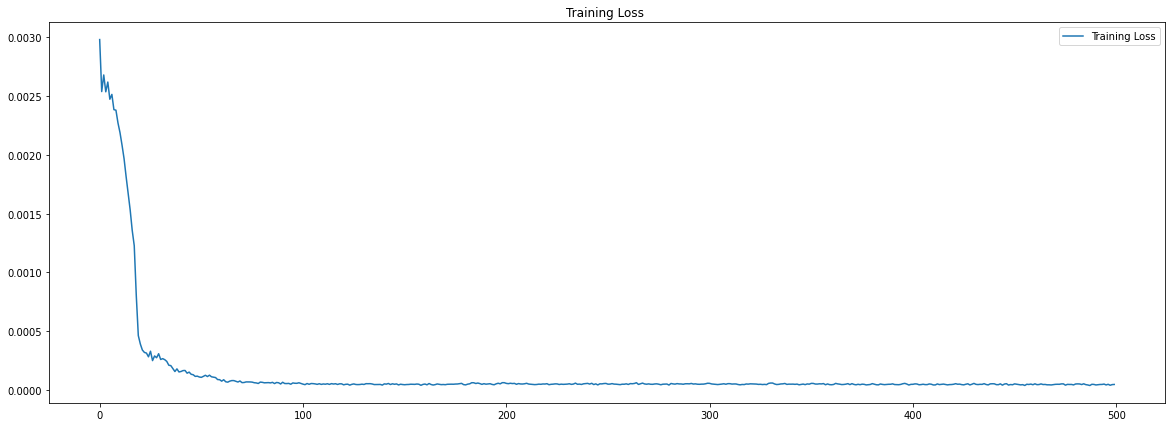

In [37]:
plt.figure(figsize=(20,7))
plt.plot(history.history['mse'],   label= 'Training Loss')
plt.title ( 'Training Loss ')
plt.legend()
plt.show()

In [38]:
y_pred = model.predict(X_test)


In [39]:
y_pred_inv=(1/scaler.scale_[len(scaler.scale_)-1])*y_pred

In [40]:
y_test_inv=(1/scaler.scale_[len(scaler.scale_)-1])*y_test

In [41]:
score= r2_score(y_test_inv,y_pred_inv)
print ( 'R2 score : {0:.3f} \n'.format(score))

R2 score : 0.384 



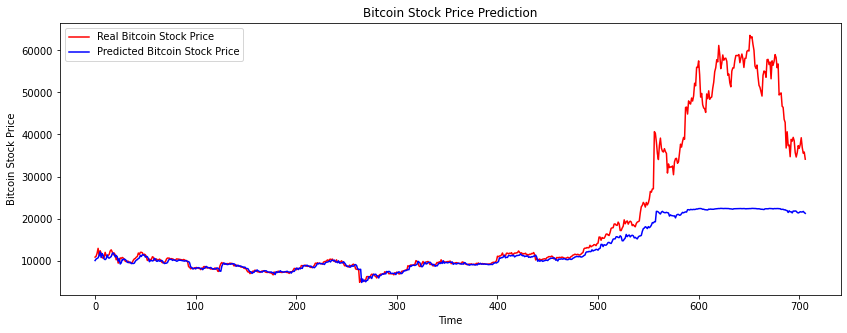

In [42]:
plt.figure(figsize=(14,5))
plt.plot(y_test_inv, color = 'red', label = 'Real Bitcoin Stock Price')
plt.plot(y_pred_inv, color = 'blue', label = 'Predicted Bitcoin Stock Price')
plt.title('Bitcoin Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Stock Price')
plt.legend()
plt.show()